<a href="https://colab.research.google.com/github/yuneidy1703-png/Analisis-datos-fac-equipo-Yun/blob/main/Reportes/Analisis_demografico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Demográfico**

**Responsabilidades:**

*   Explorar las columnas básicas de demografía
*   Crear visualizaciones simples de edad, género, rango
*   Documentar hallazgos principales


In [2]:
#Demografia basica.py
#Librerias
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Conectar a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Leer los datos
df = pd.read_excel('/content/drive/MyDrive/Python/JEFAB_2024.xlsx')

In [5]:
# Explorar estructura básica
print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")

=== INFORMACIÓN GENERAL ===
Total de registros: 6423
Total de columnas: 231


# **Preguntas**
1. ¿Cuál es el rango de edad más común?
2. ¿Hay diferencias en la distribución por género?
3. ¿Cuál es el grado militar más frecuente?

# **1. ¿Cuál es el rango de edad más común?**

In [7]:
#  1.¿Cuál es el rango de edad más común?
# Retomamos el analisis de edad
print("\n=== RANGO DE EDAD MÁS COMÚN ===")
print("Promedio:", df['EDAD2'].mean().round(1))
print("Mínima:", df['EDAD2'].min())
print("Máxima:", df['EDAD2'].max())


=== RANGO DE EDAD MÁS COMÚN ===
Promedio: 36.7
Mínima: 18.0
Máxima: 69.0


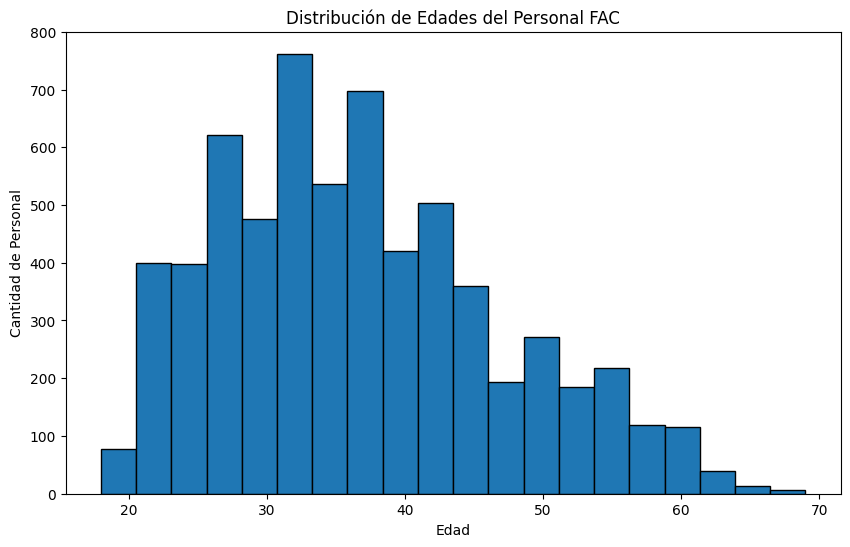

In [8]:
# Gráfico de edades
plt.figure(figsize=(10, 6))
plt.hist(df['EDAD2'], bins=20, edgecolor='black')
plt.title('Distribución de Edades del Personal FAC')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personal')
plt.show()

In [9]:
# Con la columna EDAD_RANGO ya categorizada
print("Rango más común:", df['EDAD_RANGO'].mode()[0])
print(df['EDAD_RANGO'].value_counts())

Rango más común: 33-37
EDAD_RANGO
33-37    1254
28-32    1211
38-42    1012
23-27     958
43-47     601
48-52     470
53-57     371
18-22     309
58-62     194
63-67      26
68-72       4
Name: count, dtype: int64


In [10]:
print("\n=== PROPORCION POR RANGO DE EDAD ===")
print(df['EDAD_RANGO'].value_counts(normalize=True) * 100)


=== PROPORCION POR RANGO DE EDAD ===
EDAD_RANGO
33-37    19.563183
28-32    18.892356
38-42    15.787832
23-27    14.945398
43-47     9.375975
48-52     7.332293
53-57     5.787832
18-22     4.820593
58-62     3.026521
63-67     0.405616
68-72     0.062402
Name: proportion, dtype: float64


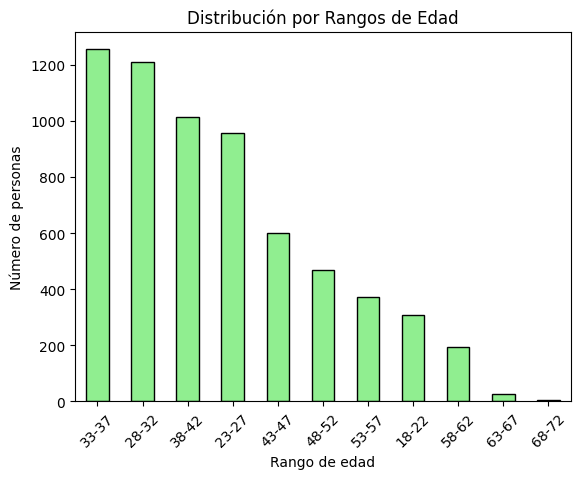

In [11]:
# Gráfico
df['EDAD_RANGO'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribución por Rangos de Edad")
plt.xlabel("Rango de edad")
plt.ylabel("Número de personas")
plt.xticks(rotation=45)
plt.show()

De esta manera podemos indicar que el rango de edad mas comun en nuestra base de datos es de 33-37 años con una edad promedio de 36.7 años

# **2. ¿Hay diferencias en la distribución por género?**

In [12]:
# 2. ¿Hay diferencias en la distribución por género?
print("\n=== DISTRIBUCIÓN POR GÉNERO ===")
print(df['GENERO'].value_counts(normalize=True) * 100)


=== DISTRIBUCIÓN POR GÉNERO ===
GENERO
MASCULINO     69.297836
FEMENINO      30.437490
OTRO           0.233536
NO BINARIO     0.031138
Name: proportion, dtype: float64


In [13]:
# Análisis de género
print("\n=== ANÁLISIS DE GÉNERO ===")
print(df['GENERO'].value_counts())


=== ANÁLISIS DE GÉNERO ===
GENERO
MASCULINO     4451
FEMENINO      1955
OTRO            15
NO BINARIO       2
Name: count, dtype: int64


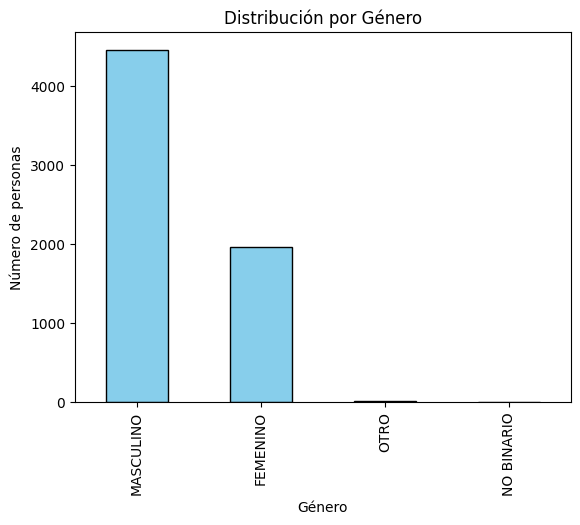

In [15]:
# Gráfico
df['GENERO'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Número de personas")
plt.show()

En cuanto a la variable género, se observa un claro predominio del genero masculino dentro de la muestra, seguido por el femenino en menor proporción. Las categorías “Otro” y “No binario” tienen una baja participación.

# **3. ¿Cuál es el grado militar más frecuente?**

In [17]:
# 3. ¿Cuál es el grado militar más frecuente?
print("\n=== GRADO MILITAR MÁS FRECUENTE ===")
print("Grado más frecuente:", df['GRADO'].mode()[0])
print(df['GRADO'].value_counts().head())


=== GRADO MILITAR MÁS FRECUENTE ===
Grado más frecuente: NO RESPONDE
GRADO
NO RESPONDE    1929
T3              622
T2              621
T1              491
CT              483
Name: count, dtype: int64


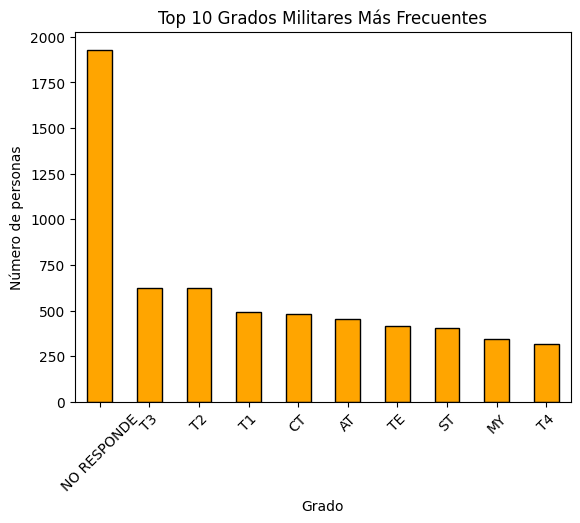

In [18]:
# Gráfico
df['GRADO'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Grados Militares Más Frecuentes")
plt.xlabel("Grado")
plt.ylabel("Número de personas")
plt.xticks(rotation=45)
plt.show()

La categoría más frecuente fue “No responde”, lo que evidencia un vacío de información en los registros. Entre quienes reportaron su rango, predominan los grados técnicos (T3 y T2), lo cual refleja que gran parte del personal encuestado corresponde a suboficiales técnicos en diferentes niveles. Los grados de oficiales aparecen en menor proporción.

In [16]:
# Revisar relación entre CATEGORIA y GRADO
pd.crosstab(df['CATEGORIA'], df['GRADO']).head(10)

GRADO,AT,BG,CR,CT,GR,MG,MY,NO RESPONDE,ST,T1,T2,T3,T4,TC,TE,TJ,TJC,TS
CATEGORIA,,,,,,,,,,,,,,,,,,
CIVIL,0,0,0,0,0,0,0,1929,0,0,0,0,0,0,0,0,0,0
OFICIAL,0,5,47,483,1,1,343,0,406,1,0,1,0,140,416,0,0,0
SUBOFICIAL,453,0,1,0,0,1,0,0,0,490,621,621,319,0,0,61,11,72


In [15]:
# Revisar porcentaje de "No responde" por CATEGORIA
no_responde = df[df['GRADO'] == "NO RESPONDE"]
print(no_responde['CATEGORIA'].value_counts(normalize=True) * 100)

CATEGORIA
CIVIL    100.0
Name: proportion, dtype: float64


En el análisis del grado militar se observa que la categoría “No responde” corresponde en su totalidad a personal clasificado como “CIVIL”. Por lo tanto, esta ausencia no debe interpretarse como un dato faltante, sino como un valor no aplicable para este grupo, ya que los civiles no tienen rango militar

# Clonar el repo en github

In [18]:
!git clone https://github.com/yuneidy1703-png/Analisis-datos-fac-equipo-Yun.git

Cloning into 'Analisis-datos-fac-equipo-Yun'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 1), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 5.25 MiB | 28.60 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [19]:
%cd Analisis-datos-fac-equipo-Yun

/content/Analisis-datos-fac-equipo-Yun


In [22]:
!mv /content/drive/MyDrive/Colab\ Notebooks/Analisis_demografico.ipynb Reportes/

In [24]:
!git config --global user.email "yuneidy1703@gmail.com"
!git config --global user.name "Yuneidy"

In [25]:
!git config user.mail "yuneidyuniverisidad@gmail.com"
!git config user.name "Yun"

In [26]:
!git add Reportes/Analisis_demografico.ipynb

In [27]:
!git commit -m "Agrega notebook analisis_demografico a Reportes desde Colab"

[main 0651f61] Agrega notebook analisis_demografico a Reportes desde Colab
 1 file changed, 1 insertion(+)
 create mode 100644 Reportes/Analisis_demografico.ipynb


In [29]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address
